# Assignment 4 - COMP 6934 - Data Visualization
### Name: Ganeshkirubashankar Pavadaisamy
### Student ID: 202192154
### Date: 10 March 2023

### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib_venn as venn 
import warnings
warnings.filterwarnings('ignore')

### Question 1: Use Seaborn to recreate the plot from Question 3 of Assignment 2. This plot shows the yearly population change (raw value) per continent over the past 60 years.

### Loading the Dataset

In [2]:
df = pd.read_csv('population.csv')

In [3]:
df

,Continent,Country,Year,Population,Yearly%Change,YearlyChange,MedianAge,UrbanPopulation
0,Asia,Afghanistan,1955,8270991,1.30,103775,19.2,587818
1,Asia,Afghanistan,1960,8996973,1.70,145196,18.8,755797
2,Asia,Afghanistan,1965,9956320,2.05,191869,18.4,984350
3,Asia,Afghanistan,1970,11173642,2.33,243464,17.9,1295433
4,Asia,Afghanistan,1975,12689160,2.58,303104,17.3,1717422
...,...,...,...,...,...,...,...,...
4225,Africa,Zimbabwe,2016,14030331,1.56,215702,18.5,5215894
4226,Africa,Zimbabwe,2017,14236595,1.47,206264,18.5,5328766
4227,Africa,Zimbabwe,2018,14438802,1.42,202207,18.5,5447513
4228,Africa,Zimbabwe,2019,14645468,1.43,206666,18.5,5571525


### Creating the df to plot

In [4]:
# Creating df grouped by Continents with aggregating Yearly Population Change
continent_pop_df = df.groupby(['Continent','Year'], as_index=False).agg({'YearlyChange':'sum'}).sort_values(by=['Year','Continent'], ascending=True)
continent_pop_df

,Continent,Year,YearlyChange
0,Africa,1955,4990957
18,Asia,1955,28826575
36,Europe,1955,5469984
54,Latin America and the Caribbean,1955,4781270
72,North America,1955,2965606
...,...,...,...
35,Asia,2020,39683577
53,Europe,2020,453001
71,Latin America and the Caribbean,2020,5841530
89,North America,2020,2268634


### Plotting the Graph

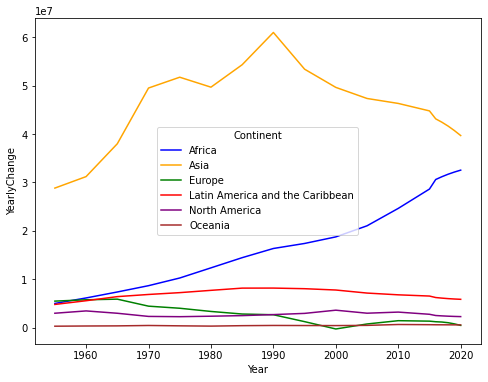

In [5]:
#Plotting the Lineplot using seaborn
plt.figure(figsize=(8,6))
colors = {"Blue":"Africa", "Orange":"Asia","Green":"Europe","Red":"Latin America and the Caribbean","Purple":"North America","Brown":"Oceania"}
sns.set_palette(colors)
ax=sns.lineplot(data=continent_pop_df,x='Year', y='YearlyChange',hue='Continent')


### Question 2: Use Seaborn to recreate the plot from Question 2 of Assignment 3. This plot shows the average height of male and female Olympians over the history of the Summer Olympics.

### Loading the Dataset

In [6]:
df2 = pd.read_csv('olympic_athletes.csv')

### Creating the Df to plot

In [7]:
height_df = df2[df2.Season=='Summer'].drop_duplicates(subset=['Name','Year'], keep='first')
height_df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN


### Plotting the Graph

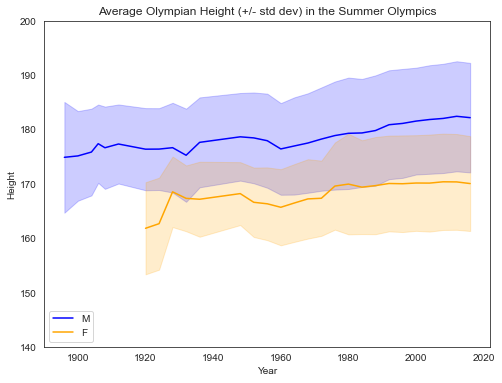

In [8]:
plt.figure(figsize=(8,6))
ax=sns.set_style('white');
ax=sns.lineplot(data=height_df,x='Year', y='Height',hue='Sex',ci="sd")
ax.set_yticks(range(140,210,10))
ax.legend(loc ='lower left')
ax.set_title("Average Olympian Height (+/- std dev) in the Summer Olympics")
plt.show()
# Source Attribution
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
#https://stackoverflow.com/questions/57439094/get-band-values-when-using-seaborn-lineplot-with-ci-parameter

### Question 3: The figure below is a sunburst plot showing the total number of video game consoles sold by Nintendo, Microsoft and Sony. The inner ring shows the total number of consoles sold per company, and the outer ring refines each company into their individual consoles.
### Recreate the above sunburst plot using Matplotlib (hint: use nested pie charts). The arc length of each wedge should be proportional to the number of units sold. Importantly, the outer ring should be aligned with the inner ring. For example, all of the Nintendo consoles on the outer ring should be within the arc spanned by Nintendo. The consoles on the outer ring should be ordered from largest number of units sold to smallest number of units sold in a clockwise fashion. The three consoles with the smallest number of units sold for Nintendo are not displayed (since that would create visual clutter). The colours of the inner ring are [#156EAF, #DB2018, #56B45B] for Microsoft, Nintendo and Sony, and [#5599CC, #EA6727, #83C143] for the outer ring. The edge colours of the wedges should be white. The labels of the inner ring should be white in colour and on the interior, and the labels of the outer ring on the exterior.

### Loading the Dataset

In [9]:
df3=pd.read_csv('game_consoles.csv')

### Preparing df to plot

In [10]:
grouped_df = df3.groupby(['Company', 'Console']).agg({'Units_sold': 'sum'}).sort_values(by='Units_sold', ascending=False)
grouped_df

Units_sold
Company   Console                         
Sony      PlayStation 2          155000000
Nintendo  Nintendo DS            154002000
          Nintendo Switch        122550000
          Game Boy               118690000
Sony      PlayStation 4          117200000
          PlayStation            102490000
Nintendo  Wii                    101630000
Sony      PlayStation 3           87400000
Microsoft Xbox 360                84000000
Sony      PlayStation Portable    82000000
Nintendo  Game Boy Advance        81510000
          Nintendo 3DS            75940000
          NES                     61910000
Microsoft Xbox One                58500000
Nintendo  SNES                    49100000
          Nintendo 64             32930000
Sony      PlayStation 5           32100000
Microsoft Xbox                    24000000
Nintendo  GameCube                21740000
Microsoft Xbox Series X/S         18500000
Sony      PlayStation Vita        15000000
Nintendo  Wii U                   13560000
          SNES Classic             5280000
          NES Classic              3560000
          Color TV-Game            3000000

In [11]:
# Preparing Df for the Inner Pie chart
company_df = grouped_df.groupby('Company').agg({'Units_sold': 'sum'})
#company_df = company_df.sort_values('Units_sold',ascending =False)
company_df

,Units_sold
Company,
Microsoft,185000000
Nintendo,845402000
Sony,591190000


In [12]:
#Preparing Df for the Outer Pie chart
console_df = grouped_df.groupby(['Company','Console']).agg({'Units_sold': 'sum'})
#console_df = console_df.sort_values('Units_sold',ascending =False)
console_df

Units_sold
Company   Console                         
Microsoft Xbox                    24000000
          Xbox 360                84000000
          Xbox One                58500000
          Xbox Series X/S         18500000
Nintendo  Color TV-Game            3000000
          Game Boy               118690000
          Game Boy Advance        81510000
          GameCube                21740000
          NES                     61910000
          NES Classic              3560000
          Nintendo 3DS            75940000
          Nintendo 64             32930000
          Nintendo DS            154002000
          Nintendo Switch        122550000
          SNES                    49100000
          SNES Classic             5280000
          Wii                    101630000
          Wii U                   13560000
Sony      PlayStation            102490000
          PlayStation 2          155000000
          PlayStation 3           87400000
          PlayStation 4          117200000
          PlayStation 5           32100000
          PlayStation Portable    82000000
          PlayStation Vita        15000000

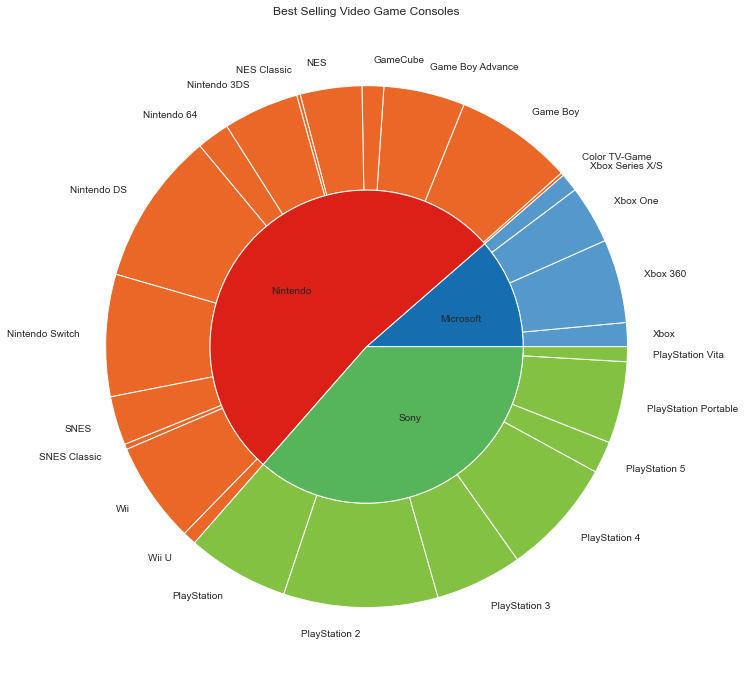

In [13]:
#Setting Labels and colors for Pie Chart
console_labels = console_df.index.get_level_values(1)
company_colors = ['#156EAF', '#DB2018', '#56B45B']
colors = {'Nintendo': '#EA6727', 'Sony': '#83C143', 'Microsoft': '#5599CC'}
console_colors = [colors[company] for company, _ in console_df.index]
# Plotting the Piechart
fig, ax = plt.subplots(figsize=(24,12))
size = 0.4
#Outer Piechart with Console name
ax.pie(console_df.values.flatten(), radius=1, 
       labels = console_labels,
       colors = console_colors,
       wedgeprops=dict(width=size, edgecolor='w'))
# Inner Piechart with Company name
ax.pie(company_df.values.flatten(), radius=1-size,
        labels=company_df.index,
        labeldistance=0.5,
        colors = company_colors,
        wedgeprops=dict( edgecolor='w', linewidth=1))

ax.set(aspect="equal", title='Best Selling Video Game Consoles')
plt.show()

#Source Attribution:
#https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html
# ChatGPT

### Question 4: The bar plot below shows the number of athletes that competed in the 2012 (dark blue) and 2016 (light blue) Olympics from a set of different countries. The Venn diagram acts as the legend – it informs the meaning of each colour. Additionally, it shows the overlap on the number of athletes (from these countries) that competed in both Olympics, and how many competed in just one of these Olympics.
### Recreate the above bar plot using Seaborn, Matplotlib and the Matplotlib-venn libraries. The colours are given by the ‘tab20’ colour palette. Make sure to include the axes labels, plot title, legend annotations, and that the countries are listed in descending order based on number of athletes in the 2012 Olympics.

### We are using  df2 for this question

In [14]:
# Creating dataframe for the year 2012 
df_2012 = df2[df2['Year'] == 2012]
df_2012.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
98,34,Jamale (Djamel-) Aarrass (Ahrass-),M,30.0,187.0,76.0,France,FRA,2012 Summer,2012,Summer,London,Athletics,"Athletics Men's 1,500 metres",NaN
134,48,Abdelhak Aatakni,M,24.0,NaN,64.0,Morocco,MAR,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Light-Welterweight,NaN
164,67,Mariya Vasilyevna Abakumova (-Tarabina),F,26.0,179.0,80.0,Russia,RUS,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Javelin Throw,NaN
174,73,Luc Abalo,M,27.0,182.0,86.0,France,FRA,2012 Summer,2012,Summer,London,Handball,Handball Men's Handball,Gold


In [15]:
# Creating Dataframe for year 2016
df_2016 = df2[df2['Year'] == 2016]
df_2016.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN


In [16]:
# Grouping by team, aggregating by taking the count of ID and sorting by descending -> top 15 Countries
df_grouped_2012 = df_2012.groupby('Team').agg({'ID': 'count'}).sort_values(by='ID', ascending=False).head(15).reset_index()
df_grouped_2016 = df_2016.groupby('Team').agg({'ID': 'count'}).sort_values(by='ID', ascending=False).head(15).reset_index()

# Creating a  'Year' column  with the year values in the above created dataframe
df_grouped_2012['Year'] = 2012
df_grouped_2016['Year'] = 2016

#Merging Both Grouped df of 2012 and 2016 based on Team
df_merged = pd.merge(df_grouped_2012, df_grouped_2016, on='Team')
df_merged

,Team,ID_x,Year_x,ID_y,Year_y
0,Great Britain,672,2012,470,2016
1,United States,669,2012,699,2016
2,Russia,541,2012,398,2016
3,Australia,506,2012,510,2016
4,Germany,494,2012,528,2016
5,China,463,2012,483,2016
6,France,422,2012,504,2016
7,Japan,395,2012,436,2016
8,Italy,374,2012,395,2016
9,Canada,354,2012,397,2016


### Creating Df for Plotting

In [17]:
# Dropping the Team which is not in the Reference Bar plot(We dont have Canada, Ukraine and Poland)
df_merged = df_merged.drop(df_merged[(df_merged['Team'] == 'Canada') | (df_merged['Team'] == 'Ukraine')  | (df_merged['Team'] == 'Poland')].index)
# Reversing the dataframe as the Bar Graph is in ascending order
df_merged = df_merged.iloc[::-1]
df_merged

,Team,ID_x,Year_x,ID_y,Year_y
12,Brazil,294,2012,571,2016
10,Spain,331,2012,353,2016
8,Italy,374,2012,395,2016
7,Japan,395,2012,436,2016
6,France,422,2012,504,2016
5,China,463,2012,483,2016
4,Germany,494,2012,528,2016
3,Australia,506,2012,510,2016
2,Russia,541,2012,398,2016
1,United States,669,2012,699,2016


### Plotting the BarGraph using Df and Venn Diagram as Legend

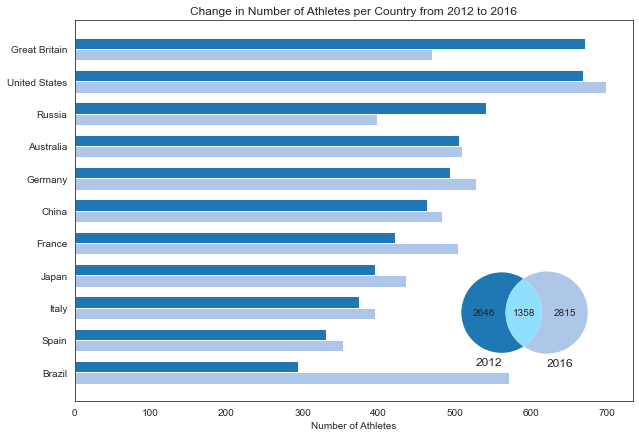

In [18]:
# Create a horizontal bar chart
fig, ax = plt.subplots(figsize=(10,7))
bar_width = 0.35

# Set the positions of the bars on the y-axis
tick_pos = np.arange(len(df_merged['Team']))

# Getting color from tab20 color palette
cm = plt.get_cmap('tab20')

# Creating two Bar plots horizontally for each country in 2012 and 2016
ax.barh(tick_pos + bar_width/2, df_merged['ID_x'], bar_width, color=cm(0), label='2012')
ax.barh(tick_pos - bar_width/2, df_merged['ID_y'], bar_width, color=cm(1), label='2016')

# Adding Labels and Title to the chart
ax.set_title('Change in Number of Athletes per Country from 2012 to 2016')
ax.set_xlabel('Number of Athletes')
ax.set_yticks(tick_pos)
ax.set_yticklabels(df_merged['Team'])

# Creating the Venn Diagram as Legend
# Selecting the DataFrame for the required countries and years
df_selected = df2.loc[
    ((df2['Team'].isin(['Great Britain', 'United States', 'Russia', 'Australia', 'Germany', 'China', 'France', 'Japan', 'Italy', 'Spain', 'Brazil'])) &
     (df2['Year'].isin([2012, 2016])))
]

# Selecting the set of athletes who participated in both years
set_2012 = set(df_selected[df_selected['Year'] == 2012]['ID'])
set_2016 = set(df_selected[df_selected['Year'] == 2016]['ID'])
set_both = set_2012.intersection(set_2016)

# Get the total number of athletes for each category
count_2012 = len(set_2012)
count_2016 = len(set_2016)
count_both = len(set_both)

# Creating Subsets for Venn Diagram
# a-> 2012 only
a=count_2012-count_both
# b-> 2016 only
b=count_2016-count_both

# Setting axes of Venn Diagram in the Bottom right corner
ax_venn = plt.axes([0.6, 0.2, 0.3, 0.2])

venn.venn2(
        subsets=(a,b,count_both),
        set_colors=(cm(0), cm(1)), 
        set_labels=('2012', '2016'), ax=ax_venn, alpha=1.0)

# Source Attribution:
#https://stackoverflow.com/questions/41296313/stacked-bar-chart-with-centered-labels
#https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
#https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305
# ChatGPT